In [360]:
import pandas as pd 
from datetime import datetime
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [362]:
df = pd.read_csv(r"C:\Users\LENOVO\Desktop\BR\training_and_development_data.csv")

In [364]:
df

,Employee ID,Training Date,Training Program Name,Training Type,Training Outcome,Location,Trainer,Training Duration(Days),Training Cost
0,1001,21-Sep-22,Customer Service,Internal,Failed,Port Greg,Amanda Daniels,4,510.83
1,1002,19-Jul-23,Leadership Development,Internal,Failed,Brandonview,Brittany Chambers,2,582.37
2,1003,24-Feb-23,Technical Skills,Internal,Incomplete,Port Briannahaven,Mark Roberson,4,777.06
3,1004,12-Jan-23,Customer Service,Internal,Completed,Knightborough,Richard Fisher,2,824.30
4,1005,12-May-23,Communication Skills,External,Passed,Bruceshire,Heather Shaffer,4,145.99
...,...,...,...,...,...,...,...,...,...
2995,3996,9-Jan-23,Customer Service,Internal,Failed,North Emily,Carmen Cortez,2,808.51
2996,3997,19-Sep-22,Project Management,External,Failed,West Zachary,Katrina Parker,4,629.16
2997,3998,26-Sep-22,Customer Service,External,Completed,Port Kyle,Andre Donaldson,1,994.09
2998,3999,2-Jul-23,Leadership Development,Internal,Incomplete,Williamsland,Brian Obrien,5,477.78


In [366]:
df.head()

,Employee ID,Training Date,Training Program Name,Training Type,Training Outcome,Location,Trainer,Training Duration(Days),Training Cost
0,1001,21-Sep-22,Customer Service,Internal,Failed,Port Greg,Amanda Daniels,4,510.83
1,1002,19-Jul-23,Leadership Development,Internal,Failed,Brandonview,Brittany Chambers,2,582.37
2,1003,24-Feb-23,Technical Skills,Internal,Incomplete,Port Briannahaven,Mark Roberson,4,777.06
3,1004,12-Jan-23,Customer Service,Internal,Completed,Knightborough,Richard Fisher,2,824.30
4,1005,12-May-23,Communication Skills,External,Passed,Bruceshire,Heather Shaffer,4,145.99


In [ ]:
##How has the completion rate (%) changed quarterly over the entire dataset? (Hint: Resample by quarter and calculate success rates.)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_27920\1184887208.py:9: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  .resample('Q')    # Group by quarter


<Axes: title={'center': 'Quarterly Training Completion Rate (%)'}, xlabel='Quarter', ylabel='Completion Rate %'>

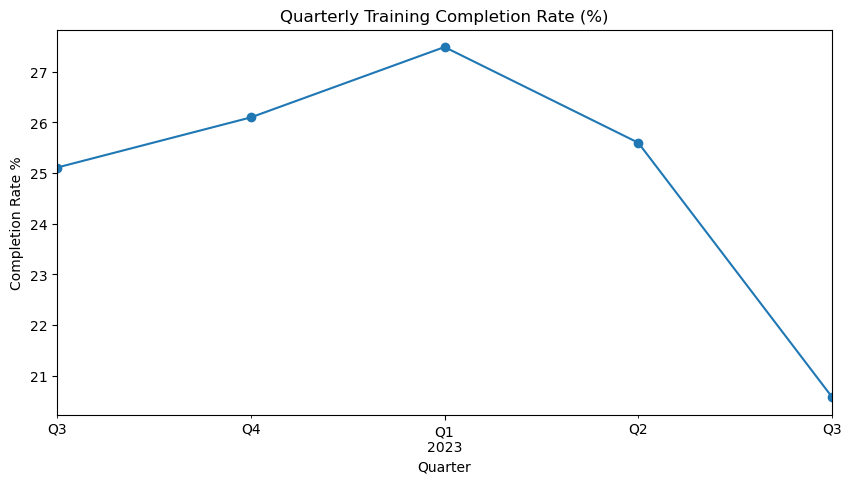

In [15]:
df['Training Date'] = pd.to_datetime(df['Training Date'], format='%d-%b-%y')
df.set_index('Training Date', inplace=True)
quarterly_completion = (df['Training Outcome'].eq('Completed').resample('Q').mean().mul(100).round(2))
quarterly_completion.plot(title='Quarterly Training Completion Rate (%)', ylabel='Completion Rate %',xlabel='Quarter',figsize=(10, 5), marker='o')

In [17]:
quarterly_completion

Training Date
2022-09-30    25.11
2022-12-31    26.10
2023-03-31    27.49
2023-06-30    25.60
2023-09-30    20.58
Freq: QE-DEC, Name: Training Outcome, dtype: float64

In [ ]:
##Which training programs offer the best "cost per successful completion" (total cost divided by number of completions)?

In [25]:
df.head()

,Employee ID,Training Program Name,Training Type,Training Outcome,Location,Trainer,Training Duration(Days),Training Cost
Training Date,,,,,,,,
2022-09-21,1001,Customer Service,Internal,Failed,Port Greg,Amanda Daniels,4,510.83
2023-07-19,1002,Leadership Development,Internal,Failed,Brandonview,Brittany Chambers,2,582.37
2023-02-24,1003,Technical Skills,Internal,Incomplete,Port Briannahaven,Mark Roberson,4,777.06
2023-01-12,1004,Customer Service,Internal,Completed,Knightborough,Richard Fisher,2,824.30
2023-05-12,1005,Communication Skills,External,Passed,Bruceshire,Heather Shaffer,4,145.99


In [41]:
successful_trainings = df[df["Training Outcome"] == "Completed"]
success_programs = successful_trainings.groupby('Training Program Name').agg(total_cost = ('Training Cost','sum'), completions = ('Training Program Name', 'count')).assign(cost_per_succesful_completion = lambda x: x['total_cost'] /x['completions']).sort_values('cost_per_succesful_completion',ascending = False).round(2)
success_programs

,total_cost,completions,cost_per_succesful_completion
Training Program Name,,,
Project Management,85445.35,144,593.37
Customer Service,95757.95,165,580.35
Leadership Development,78127.11,143,546.34
Communication Skills,105271.23,193,545.45
Technical Skills,67106.21,125,536.85


In [ ]:
##Identify trainers who conducted at least 10 sessions and have a completion rate above 70% or below 30%.

In [61]:
trainer_stats = (df.groupby('Trainer').agg(total_session = ('Trainer','count'), completion_rate = ('Training Outcome', lambda x: (x == 'Completed').mean() *100)).round(2))
trainer_stats

,total_session,completion_rate
Trainer,,
Aaron Beasley,1,0.0
Aaron Bowen,1,0.0
Aaron Duncan,1,0.0
Aaron Hubbard,1,0.0
Aaron Jones,1,100.0
...,...,...
Zachary Jennings,1,100.0
Zachary Jones,1,0.0
Zachary Wilson,1,0.0


In [79]:
filtered_trainers = trainer_stats[
    (trainer_stats['total_session'] >= 2) & 
    ((trainer_stats['completion_rate'] > 70) | (trainer_stats['completion_rate'] < 30))
].sort_values('completion_rate', ascending=False)

In [81]:
filtered_trainers

,total_session,completion_rate
Trainer,,
Michael Smith,4,75.0
Amanda Lee,2,0.0
Kristin Rodriguez,2,0.0
Robert Stevens,2,0.0
Richard Jones,2,0.0
Paul Davis,2,0.0
Patricia Hernandez,2,0.0
Michael Wright,2,0.0
Michael Nelson,2,0.0


In [ ]:
##Which training programs have the highest and lowest completion rates?

In [193]:
completed_rate = df.groupby('Training Program Name')['Training Outcome'].apply(lambda x:( x == "Completed").mean() * 100).round(2).sort_values(ascending = False)

In [195]:
highest_rates = completed_rate.head(3)

In [197]:
highest_rates

Training Program Name
Customer Service          29.20
Communication Skills      28.68
Leadership Development    24.91
Name: Training Outcome, dtype: float64

In [199]:
lowest_rates = completed_rate.tail(3)

In [201]:
lowest_rates

Training Program Name
Leadership Development    24.91
Project Management        23.65
Technical Skills          21.59
Name: Training Outcome, dtype: float64

In [ ]:
#What is the average duration difference between internal vs. external training programs?

In [165]:
df.groupby("Training Type")["Training Duration(Days)"].mean()

Training Type
External    2.952381
Internal    2.998675
Name: Training Duration(Days), dtype: float64

In [ ]:
##Which 3 training programs are the most expensive on average?

In [179]:
training_cost = df.groupby("Training Program Name")["Training Cost"].mean().sort_values(ascending = False)

In [181]:
training_cost.head(3)

Training Program Name
Customer Service          567.389451
Leadership Development    564.289251
Project Management        563.732627
Name: Training Cost, dtype: float64

In [203]:
##Which trainers have conducted sessions in multiple locations?

In [233]:
trainers = df.groupby('Trainer').agg( location_count=('Location', 'count'))
more_than_1 = trainers[trainers['location_count']> 1]
more_than_1 

,location_count
Trainer,
Amanda Lee,2
Andrea Lopez,2
Andrew Hendricks,2
Andrew Wright,2
Ariel Brown,2
Brian Lee,2
Charles Garcia,2
Christina Moore,2
Christopher Jackson,2


In [ ]:
##Which trainers have both the highest and lowest average training costs?

In [245]:
cost_of_trainers = df.groupby("Trainer")["Training Cost"].mean().sort_values(ascending = False).reset_index()
expensive_trainers = cost_of_trainers.head()
cheap_trainers = cost_of_trainers.tail()

In [247]:
cheap_trainers

,Trainer,Training Cost
2937,Katelyn Hartman,101.21
2938,Crystal Elliott,100.55
2939,Mr. Scott Gomez,100.45
2940,Christine Stein,100.17
2941,Emily Turner,100.04


In [249]:
expensive_trainers

,Trainer,Training Cost
0,Jason Williams,999.97
1,Nichole Crawford,999.96
2,Dr. Christina Johnson,999.83
3,Amanda Nelson,999.79
4,Joan Reeves,999.72


In [ ]:
##which trainers are handling more than 1 program?

In [277]:
trainer_program_count = df.groupby("Trainer").agg( programs = ("Training Program Name", "count")).assign(session_percentage = lambda x: ( x['programs']/5 * 100))

In [279]:
trainer_program_count

,programs,session_percentage
Trainer,,
Aaron Beasley,1,20.0
Aaron Bowen,1,20.0
Aaron Duncan,1,20.0
Aaron Hubbard,1,20.0
Aaron Jones,1,20.0
...,...,...
Zachary Jennings,1,20.0
Zachary Jones,1,20.0
Zachary Wilson,1,20.0


In [ ]:
##Which employees attended the most training sessions overall?

In [285]:
df.groupby("Employee ID")["Training Program Name"].count().sort_values(ascending = False)

Employee ID
1001    1
3004    1
2995    1
2996    1
2997    1
       ..
2003    1
2004    1
2005    1
2006    1
4000    1
Name: Training Program Name, Length: 3000, dtype: int64

In [ ]:
##What percentage of employees attended only one training session?

In [311]:
employee_meetings = df['Employee ID'].value_counts().reset_index(name = 'meetings attended')
employee_meetings[employee_meetings['meetings attended'] > 1]

,Employee ID,meetings attended


In [ ]:
##Which employees attended both internal and external training programs?

In [330]:
training_types_per_employee = df.groupby("Employee ID")["Training Type"].unique()
employees_with_both = training_types_per_employee[
    training_types_per_employee.apply(lambda x: set(["Internal", "External"]).issubset(set(x)))
].index

In [332]:
df[df["Employee ID"].isin(employees_with_both)]

Index([], dtype='int64', name='Employee ID')

In [334]:
##What is the total training expenditure split by program type (internal/external)?

In [336]:
df.head()

,Employee ID,Training Program Name,Training Type,Training Outcome,Location,Trainer,Training Duration(Days),Training Cost
Training Date,,,,,,,,
2022-09-21,1001,Customer Service,Internal,Failed,Port Greg,Amanda Daniels,4,510.83
2023-07-19,1002,Leadership Development,Internal,Failed,Brandonview,Brittany Chambers,2,582.37
2023-02-24,1003,Technical Skills,Internal,Incomplete,Port Briannahaven,Mark Roberson,4,777.06
2023-01-12,1004,Customer Service,Internal,Completed,Knightborough,Richard Fisher,2,824.30
2023-05-12,1005,Communication Skills,External,Passed,Bruceshire,Heather Shaffer,4,145.99


In [338]:
df.groupby("Training Type")["Training Cost"].sum()

Training Type
External    830215.65
Internal    845670.44
Name: Training Cost, dtype: float64

In [ ]:
##Which locations have the highest average training costs?

In [340]:
df.groupby("Location")["Training Cost"].mean().sort_values(ascending = False)

Location
New Ashley         999.97
Herreraland        999.83
Lake Tyler         999.79
South Davidfort    999.72
Wigginsland        999.06
                    ...  
Johnland           101.21
North Jeanfurt     100.55
Rothfort           100.45
Jasonview          100.17
North Laura        100.04
Name: Training Cost, Length: 2738, dtype: float64

In [ ]:
##Which month had the highest number of completed trainings?

In [370]:
df['Training Date'] = pd.to_datetime(df['Training Date'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_27920\2372621804.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Training Date'] = pd.to_datetime(df['Training Date'])


In [372]:
df['Training_month'] = df['Training Date'].dt.month

In [380]:
df[df["Training Outcome"] == "Completed"].groupby("Training_month")["Employee ID"].count().sort_values(ascending =False)

Training_month
11    73
3     72
4     71
9     70
2     69
1     66
10    66
5     63
12    63
6     59
8     50
7     48
Name: Employee ID, dtype: int64

In [382]:
##How has the number of trainings per month changed over time?

In [395]:
Monthly_training = df.groupby("Training_month")["Employee ID"].count()

In [401]:
Monthly_training.index = Monthly_training.index.map({
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"})

<Axes: title={'center': 'Number of Trainings per month'}, xlabel='Training Months', ylabel='Training Count'>

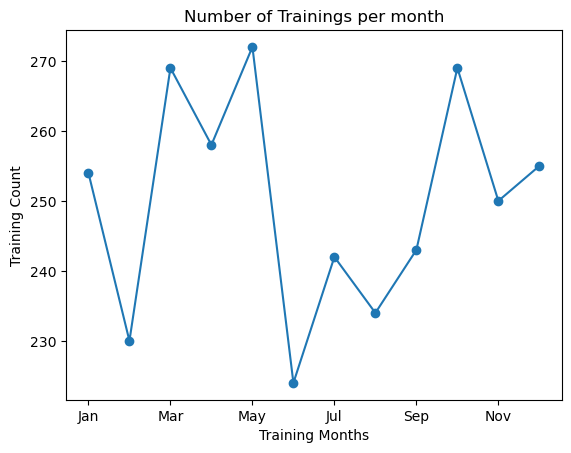

In [413]:
Monthly_training.plot(xlabel = "Training Months", ylabel = "Training Count", title = "Number of Trainings per month", marker = 'o')